In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [47]:
def plot＿confusion＿matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [48]:
data = pd.read_csv('../Data/santander-customer-transaction-prediction/train.csv')
data.drop('ID_code', axis=1, inplace=True)
data.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


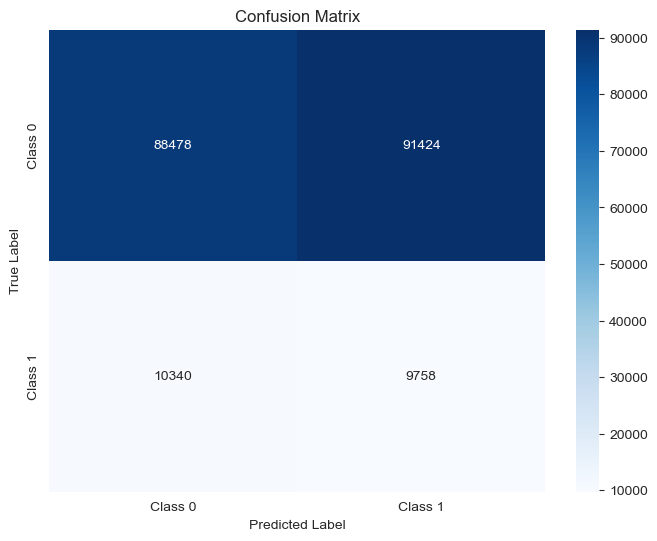

              precision    recall  f1-score   support

           0       0.90      0.49      0.63    179902
           1       0.10      0.49      0.16     20098

    accuracy                           0.49    200000
   macro avg       0.50      0.49      0.40    200000
weighted avg       0.82      0.49      0.59    200000



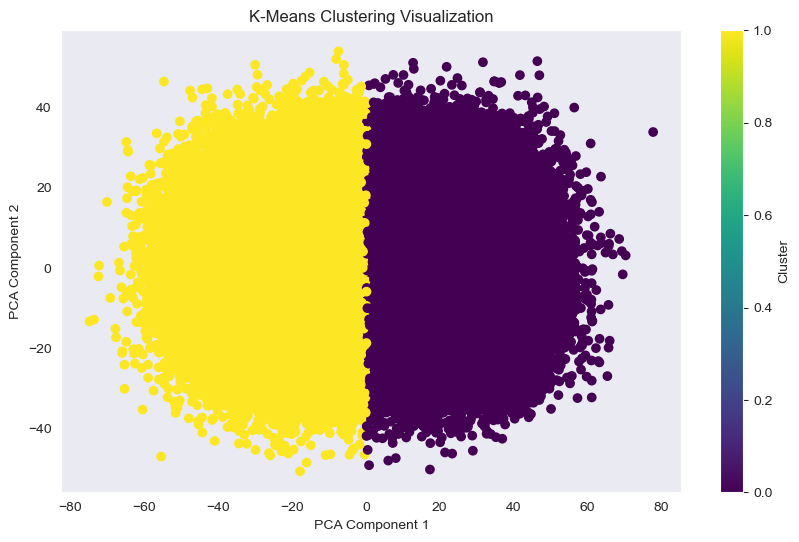

In [49]:
# without PCA

X = data.drop('target', axis=1) 
Y = data['target']



# Initialize KMeans
from sklearn.cluster import KMeans

# Set the number of clusters
n_clusters = 2  

# Fit KMeans directly
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(X)  
plot＿confusion＿matrix(confusion_matrix(y_true=Y, y_pred=y_pred))
print(classification_report(y_true=Y, y_pred=y_pred))

pca = PCA()
X_pca = pca.fit_transform(X)

# Visualize the clusters with PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', marker='o')
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


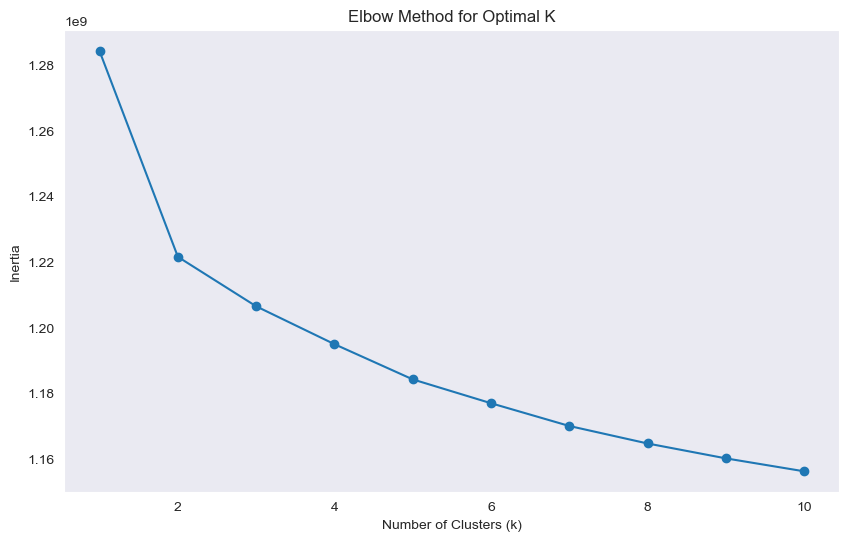

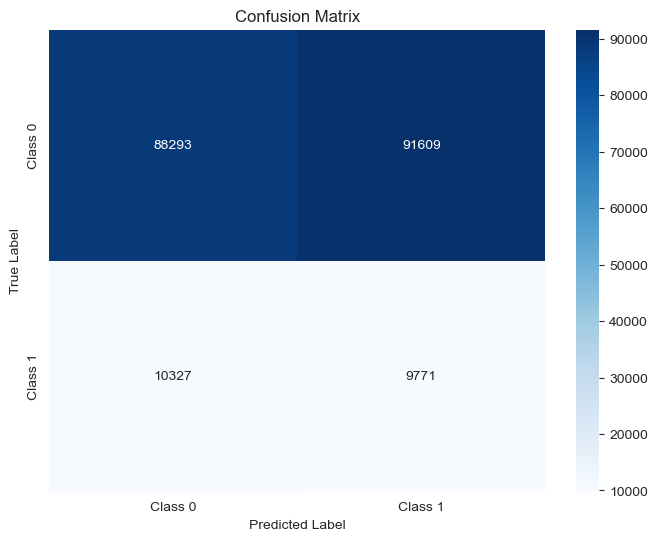

              precision    recall  f1-score   support

           0       0.90      0.49      0.63    179902
           1       0.10      0.49      0.16     20098

    accuracy                           0.49    200000
   macro avg       0.50      0.49      0.40    200000
weighted avg       0.82      0.49      0.59    200000



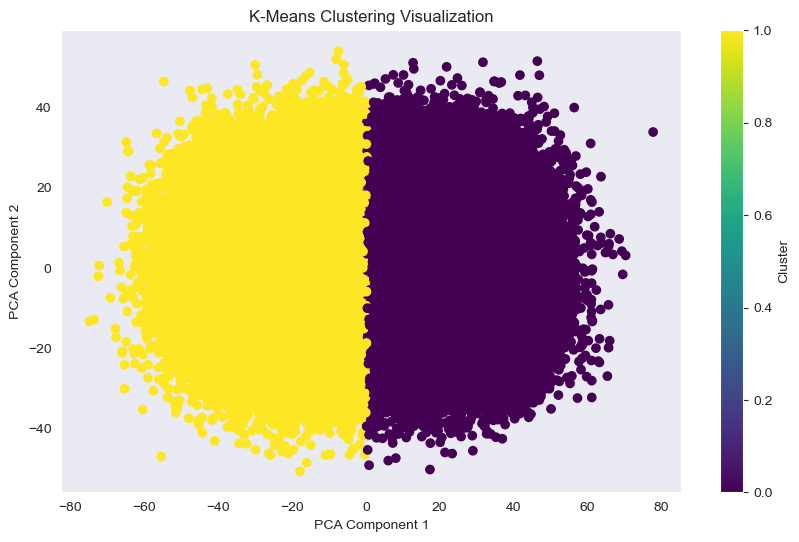

In [50]:
#with PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


inertia = []
k_range = range(1, 11) 
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=43)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


# Setting the optimal number of clusters
X = PCA(n_components=90).fit_transform(X)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=43)
y_pred = kmeans.fit_predict(X)

# Add cluster label to the original data

plot＿confusion＿matrix(confusion_matrix(y_true=Y, y_pred=y_pred))

pca = PCA()
X_pca = pca.fit_transform(X)
print(classification_report(y_true=Y, y_pred=y_pred))
# Visualize the clusters with PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', marker='o')
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()
